In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import matplotlib
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
#import pmdarima as pm
import warnings
import statsmodels
import datetime as dt
from sklearn.metrics import mean_squared_error
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AllScorePerDay',index_col='dates')

In [3]:
pr = pd.read_csv('LSTMpreds')

In [92]:
df['score'] = df['score'].diff()
df = df.dropna()
print(np.std(df))

score    3.059358e-02
mean     1.387779e-16
dtype: float64

In [ ]:
0.03059358

In [96]:

print(np.std(df)*np.std(df))

score    0.001502
dtype: float64


In [36]:
dfP = pd.read_csv('AllPropPword', index_col='dates')
dfP = dfP.shift(1)
dfP = dfP.fillna(np.mean(dfP))


In [3]:
df['holiday'] = 0
df['covid'] = 0

for index, score in enumerate(df['score']):
    if score >0.04:
        print(index)
        df['holiday'][index] = 1
    if score < -0.18:
        #print(index)
        df['covid'][index] = 1
        #df['0'][index] = mean
        

0
358
359
365
366
723
724
730


In [4]:
df3 = pd.DataFrame()
#df3 = df[['covid']]
#df3 = df3.set_index(df.index)
df3 = df[['holiday','covid']]
#df3['Pword'] = dfP['0']

df3

,holiday,covid
dates,,
2020-01-01,1,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
2020-01-05,0,0
...,...,...
2021-12-27,0,0
2021-12-28,0,0
2021-12-29,0,0


In [86]:
mean = np.mean(df['score'][:366])

In [89]:
df['mean'] = mean

In [7]:
from datetime import datetime as dt

In [9]:
pred = []
start = dt.now()
        
for s in range(366,731):

    model = ARIMA(df['score'][:s], order=(0,1,3), seasonal_order=(1,0,0,7))
    results = model.fit()
    pre = results.predict(start=s, end=s,dynamic=False)
    pred.append(pre[0])
    if s == 730:
        print( (dt.now() - start).seconds)

188


In [11]:
mean_absolute_error(df['score'][366:], pred)

0.018155964198973768

In [10]:
from sklearn.metrics import mean_absolute_error

In [16]:
from math import sqrt

In [24]:
mean_absolute_error(df['score'][366:], pred)

0.01850331633437335

In [19]:
np.std(df['score'][366:])

0.034985645689791435

In [10]:
mean_squared_error(df['score'][366:], pred)

0.0005948944059162306

In [101]:
np.sqrt(mean_squared_error(df['score'][366:], pred))

0.026086052094172092

In [25]:

def percent(arg):
    #arg = arg[0]
    a = 0.0316
    b = arg - a
    return (b/a)*100

percent(0.0244)

-22.78481012658228

In [52]:
vanilla = [0.026086052094172092]
dummy = [0.02439045727156895]
Pword = [0.027471951395947325]
dummy_pword = [0.02439376743159243]


In [7]:
pred = []
for s in range(366,731):
    exog = df3
    model = ARIMA(df['score'][:s], order=(0,1,3),exog=exog[:s])
    results = model.fit()
    exog = df3.iloc[s]
    pre = results.predict(start=s,exog=exog)
    pred.append(pre)


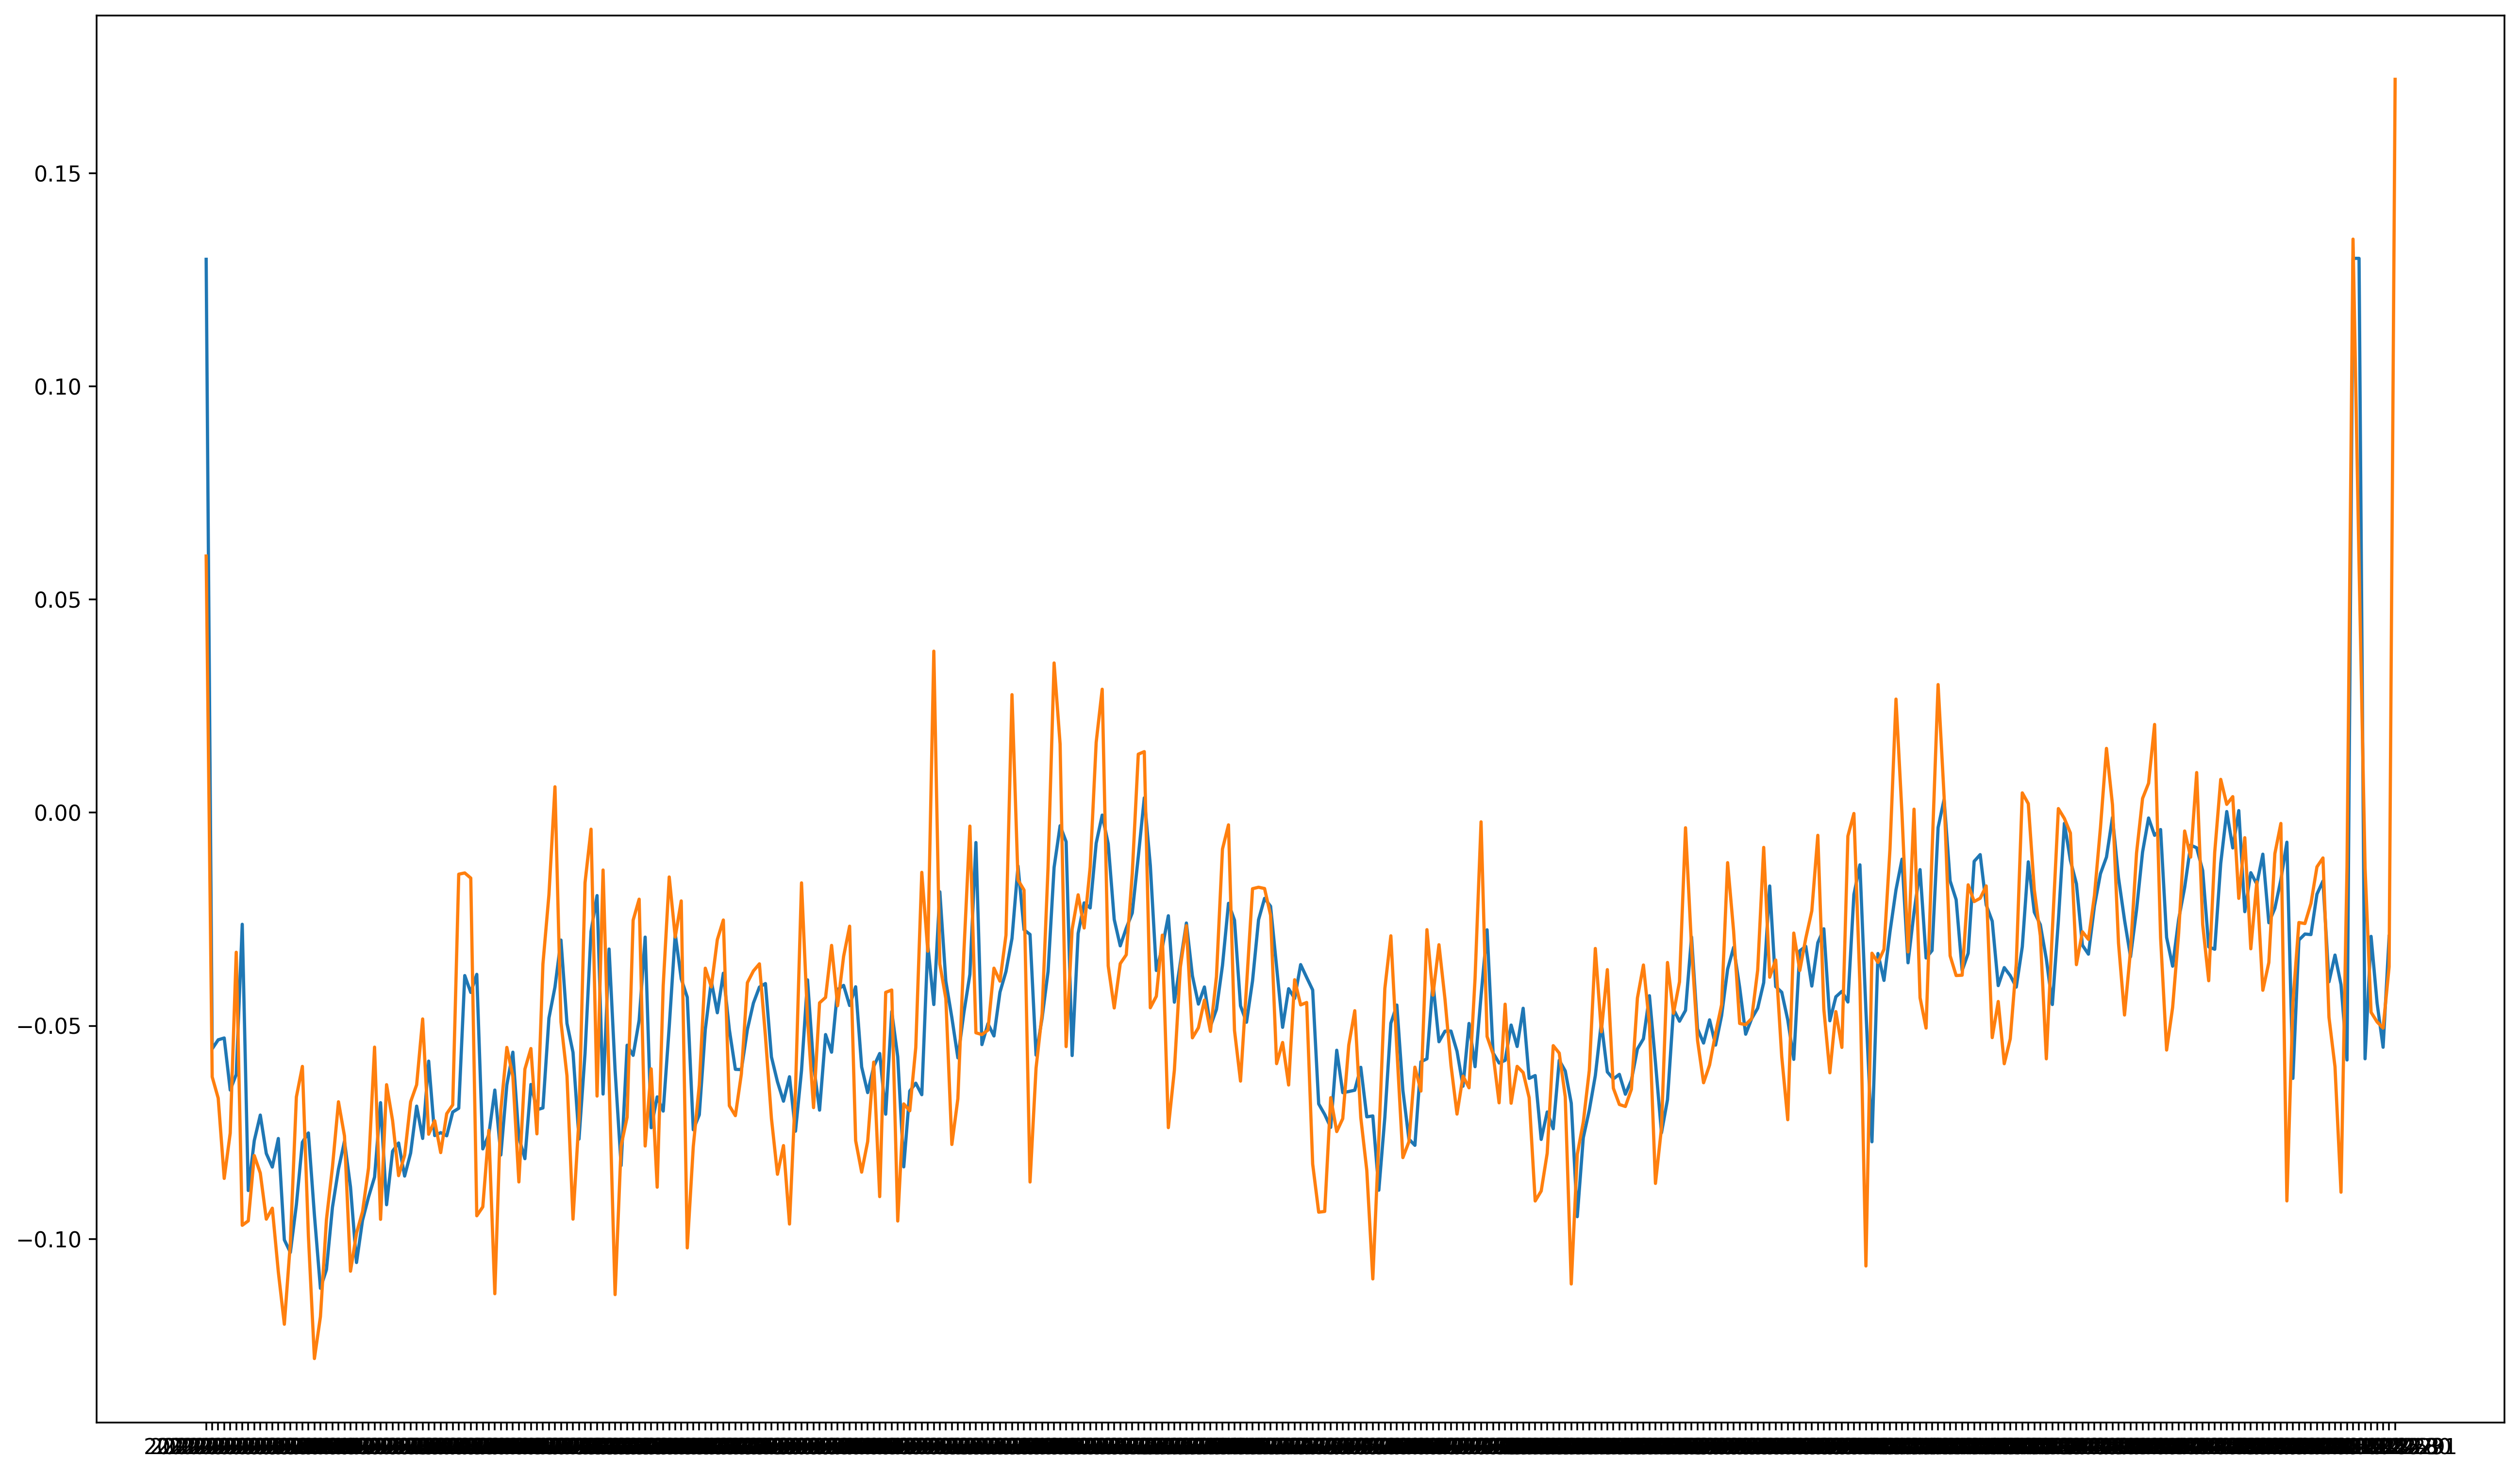

In [325]:
figure(figsize=(20,12), dpi=320)
plt.plot(pred)
plt.plot(df['score'][366:])

In [19]:
da = [i for i in pr['0']]
da

[0.17197881333324258,
 0.05867402997678513,
 -0.062093217886221075,
 -0.06871920723570639,
 -0.08513025859028399,
 -0.07566901140705169,
 -0.033158396110767395,
 -0.09509405834180452,
 -0.0961156649489599,
 -0.080074172703367,
 -0.08635226433443531,
 -0.09457606366055064,
 -0.09350961748197076,
 -0.10795795911867284,
 -0.11937736715135115,
 -0.10106900862201908,
 -0.06665716113778047,
 -0.06069339497010879,
 -0.09893340500347307,
 -0.1278387618184492,
 -0.11915166133148727,
 -0.093863068865499,
 -0.08431237934158503,
 -0.06867253572476904,
 -0.07783965371041618,
 -0.10585777600669144,
 -0.09735164406340006,
 -0.0983685723038387,
 -0.0833670054854449,
 -0.05835225116304998,
 -0.09665172256266903,
 -0.06748985212190332,
 -0.07011120315193126,
 -0.08404837062778851,
 -0.08133073743320947,
 -0.07011081138290484,
 -0.06338293061452928,
 -0.05501181729919002,
 -0.07331306735797939,
 -0.07145946079365845,
 -0.07770017118864234,
 -0.06818033693764948,
 -0.06501143605036791,
 -0.015145706514293

            Predictions
2021-01-01     0.171979
2021-01-02     0.058674
2021-01-03    -0.062093
2021-01-04    -0.068719
2021-01-05    -0.085130


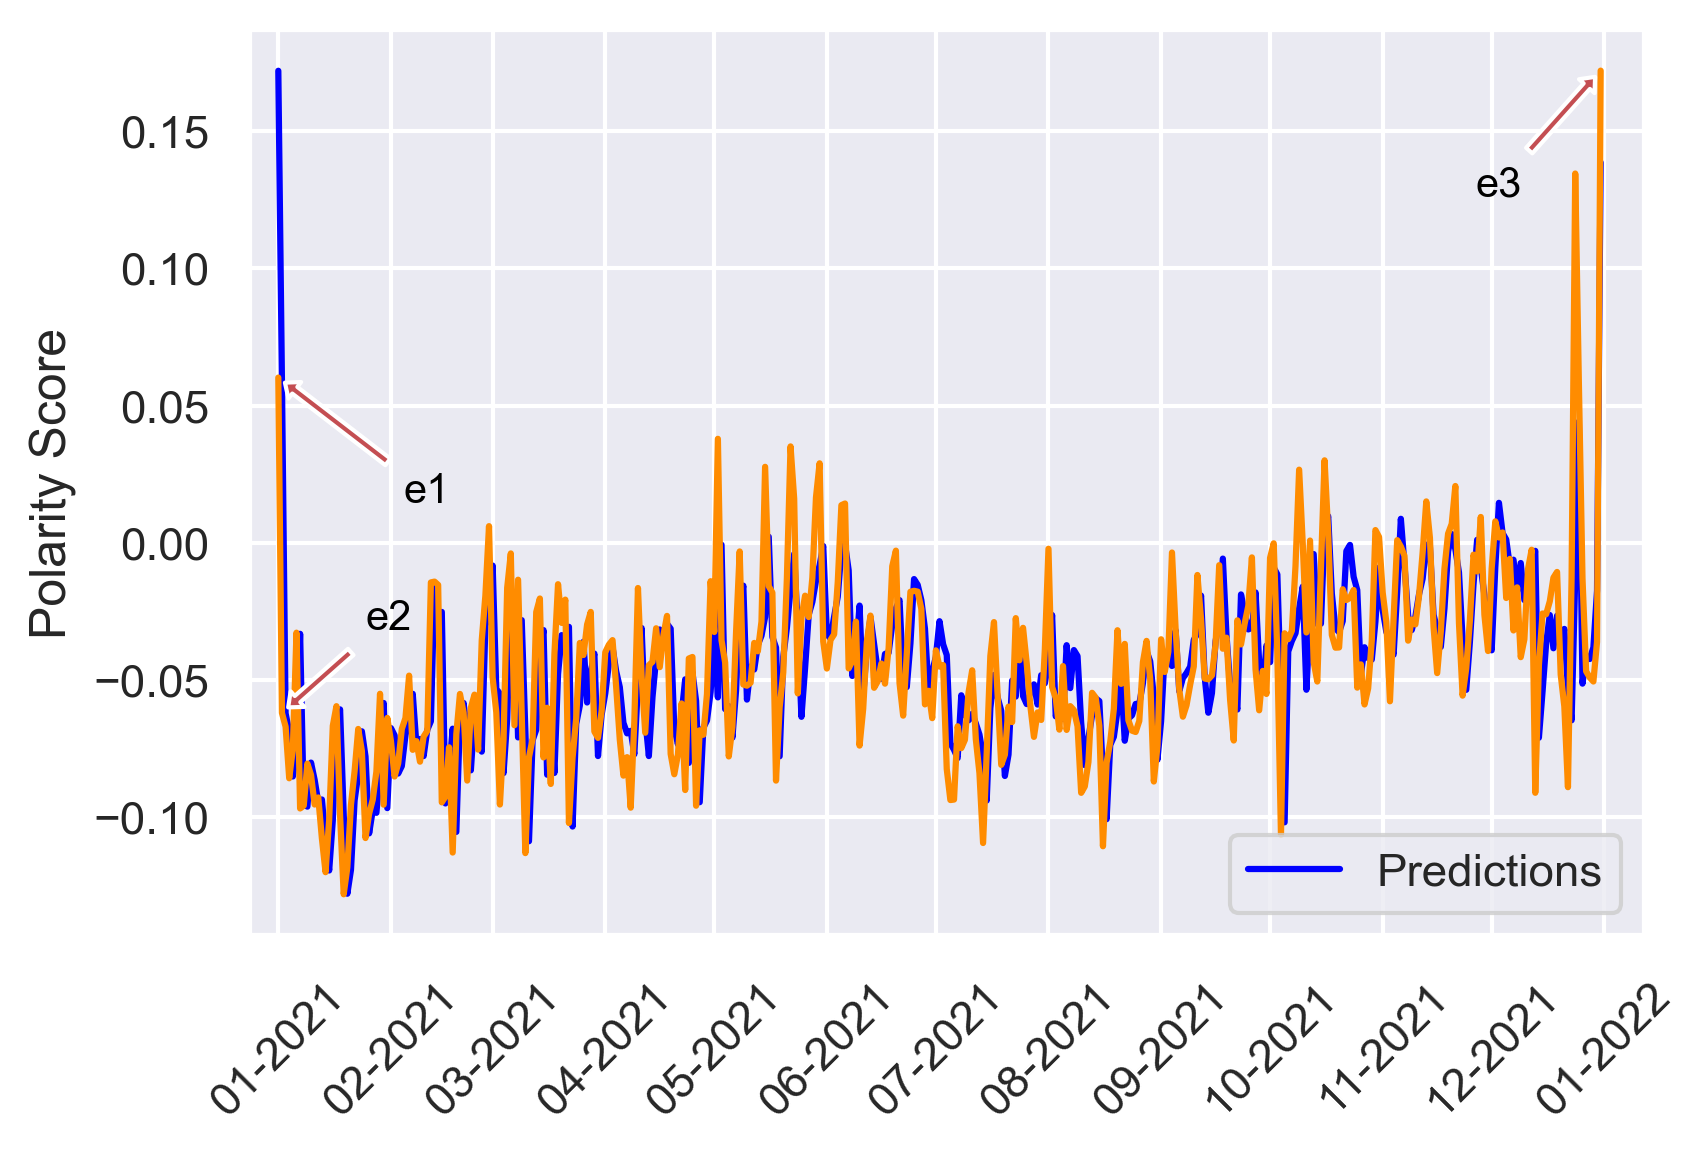

In [43]:
index = pd.date_range(start = "2021-01-01", end = "2021-12-31", freq = "D")
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
polarity = da
df2 = pd.DataFrame(data=polarity,index=index, columns=['Predictions'])
print (df2.head())

ax = df2.plot(color='blue')
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()
#sns.lineplot(data)
#plt(figsize=(8, 6), dpi=80)
plt.ylabel('Polarity Score')
plt.plot(index, df['score'][366:],color='darkorange')
plt.xticks(rotation=45)
plt.legend()
plt.xlim('2020-12-24','2022-01-12')
#plt.grid()
sns.set(rc={"figure.dpi":300})
point1 = ['2021-01-01', 0.060199]
point2 = ['2021-01-02', -0.061971 ]
point3 = ['2021-12-31', 0.172022
 ]


ax.annotate('e1', xy=point1, xytext=(30, -30),

   textcoords='offset points',
   color='black', size='small',
   arrowprops=dict(
      arrowstyle='simple,tail_width=0.2,head_width=0.5,head_length=0.3',
      facecolor='r')#, #shrinkB=radius * 1.2)
   )
ax.annotate('e2', xy=point2, xytext=(20, 20),

   textcoords='offset points',
   color='black', size='small',
   arrowprops=dict(
      arrowstyle='simple,tail_width=0.2,head_width=0.5,head_length=0.3',
      facecolor='r')#, #shrinkB=radius * 1.2)
   )
ax.annotate('e3', xy=point3, xytext=(-30, -30),

   textcoords='offset points',
   color='black', size='small',
   arrowprops=dict(
      arrowstyle='simple,tail_width=0.2,head_width=0.5,head_length=0.3',
      facecolor='r')#, #shrinkB=radius * 1.2)
   )
plt.show()

In [157]:
da = [i[0] for i in pred]

In [156]:
for i in pred:
    print(i[0])

0.14225280616023747
-0.06129573725060066
-0.05306473038873511
-0.05082769115040784
-0.06766799991085834
-0.06263157637074371
-0.039827976679696446
-0.07743352738263415
-0.07821390642220655
-0.0694415794759359
-0.07562927916536988
-0.08314446468638029
-0.08265570852841862
-0.09275619198590081
-0.10180374945392655
-0.09278714938112063
-0.07532836572695219
-0.07219117584989167
-0.0937591394935554
-0.1085770315434636
-0.10353652752976354
-0.09326819080105882
-0.08834734910653533
-0.0797010345782024
-0.08329567913811793
-0.1001975400427366
-0.0940130465644872
-0.09165063404276473
-0.08715302290168743
-0.07072691376947622
-0.09323361715142751
-0.07423110563491332
-0.07730406579170747
-0.08517400586108184
-0.08085924692273312
-0.073815141788553
-0.07166650284576767
-0.06207278141213632
-0.07603522969969227
-0.07318422425392038
-0.07640374141893427
-0.07201509341954185
-0.07071322669448132
-0.04020058340705884
-0.038375355421567794
-0.03680341946756263
-0.07834318388667887
-0.07629618944843701

In [108]:
import seaborn as sns

In [172]:
print(df.iloc[[69,72,215,365,366,487,712]])

               score  holiday  covid
dates                               
2020-03-10 -0.155836        0      0
2020-03-13 -0.165234        0      0
2020-08-03 -0.143443        0      0
2020-12-31  0.168712        1      0
2021-01-01  0.060199        1      0
2021-05-02  0.037883        0      0
2021-12-13 -0.091066        0      0


In [38]:
df.loc[['2021-01-01', '2021-01-02', '2021-12-31']]

,score
dates,
2021-01-01,0.060199
2021-01-02,-0.061971
2021-12-31,0.172022


In [26]:
mean = np.mean(da)
std = np.std(da)
out_b= mean - (std*3)
out_a=mean + (std*3)
for ii, i in enumerate(da):
    if i < out_b or i > out_a:
        print(i, ii)
    

0.17197881333324258 0
0.05867402997678513 1
0.13857487211702668 364


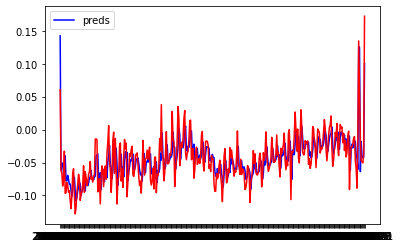

In [127]:
#plt.xticks(rotation=45)
plt.plot(pred,label='preds',color='b')
plt.plot(df['score'][366:],color='r')
plt.legend()

In [ ]:
plt.plot(df['score'][:366])

In [327]:
model = ARIMA(df['score'][:367], order=(0,1,3),exog=df3[:367])
results = model.fit()
#print(results.summary())

In [146]:
results.resid[365]

0.16463726361116057

In [110]:
a = (results.resid[-1]* -0.3713   ) + (results.resid[-2] *    -0.2479  ) + (results.resid[-3]*  -0.1946  )
a + df['score'][365]

0.09831615635771063

In [44]:
b = (-0.032017 * -0.4017  ) + ( 0.199783 *-0.2355  ) + (  -0.008263*-0.1831 )
b + df['score'][366]

0.027524109496759944

In [159]:
df.iloc[363]

score   -0.042006
Name: 2020-12-29, dtype: float64

In [148]:
a = (results.resid[365]* -0.3713  ) + (results.resid[364] * -0.2479       ) + (results.resid[364]*   -0.1946     )
a + df['score'][365]

0.0983405516631749

In [337]:
np.sqrt(mean_squared_error(df['score'][366:], pred))

ValueError: Found input variables with inconsistent numbers of samples: [365, 364]

In [158]:
figure(figsize=(20,12), dpi=320)
plt.plot(df[366].index, arima_mean, label='forecasted',color='red')
plt.plot(arima_mean.index,df['score'][-365:])
#plt.plot(arima_mean.index, arima_mean)
plt.legend()

-0.005669527611288319

In [331]:
pred

[2021-01-01    0.142253
 Freq: D, dtype: float64,
 2021-01-02   -0.061296
 Freq: D, dtype: float64,
 2021-01-03   -0.053065
 Freq: D, dtype: float64,
 2021-01-04   -0.050828
 Freq: D, dtype: float64,
 2021-01-05   -0.067668
 Freq: D, dtype: float64,
 2021-01-06   -0.062632
 Freq: D, dtype: float64,
 2021-01-07   -0.039828
 Freq: D, dtype: float64,
 2021-01-08   -0.077434
 Freq: D, dtype: float64,
 2021-01-09   -0.078214
 Freq: D, dtype: float64,
 2021-01-10   -0.069442
 Freq: D, dtype: float64,
 2021-01-11   -0.075629
 Freq: D, dtype: float64,
 2021-01-12   -0.083144
 Freq: D, dtype: float64,
 2021-01-13   -0.082656
 Freq: D, dtype: float64,
 2021-01-14   -0.092756
 Freq: D, dtype: float64,
 2021-01-15   -0.101804
 Freq: D, dtype: float64,
 2021-01-16   -0.092787
 Freq: D, dtype: float64,
 2021-01-17   -0.075328
 Freq: D, dtype: float64,
 2021-01-18   -0.072191
 Freq: D, dtype: float64,
 2021-01-19   -0.093759
 Freq: D, dtype: float64,
 2021-01-20   -0.108577
 Freq: D, dtype: float64,


In [9]:
np.sqrt(mean_squared_error(df['score'][366:],pred))

0.02439045727156895

In [153]:
arima_pred = results.get_prediction(start=366, end=len(df)-1,dynamic=False)
arima_mean = arima_pred.predicted_mean
arima_mean

2021-01-01    0.098269
2021-01-02    0.009069
2021-01-03   -0.052618
2021-01-04   -0.032433
2021-01-05   -0.050759
                ...   
2021-12-27   -0.023214
2021-12-28   -0.029655
2021-12-29   -0.031113
2021-12-30   -0.033392
2021-12-31   -0.025800
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [18]:
mae = 0
for i in zip(df['score'][-365:], arima_mean):
    mae += abs(i[0]-i[1])
mae/365

0.017859569233465707

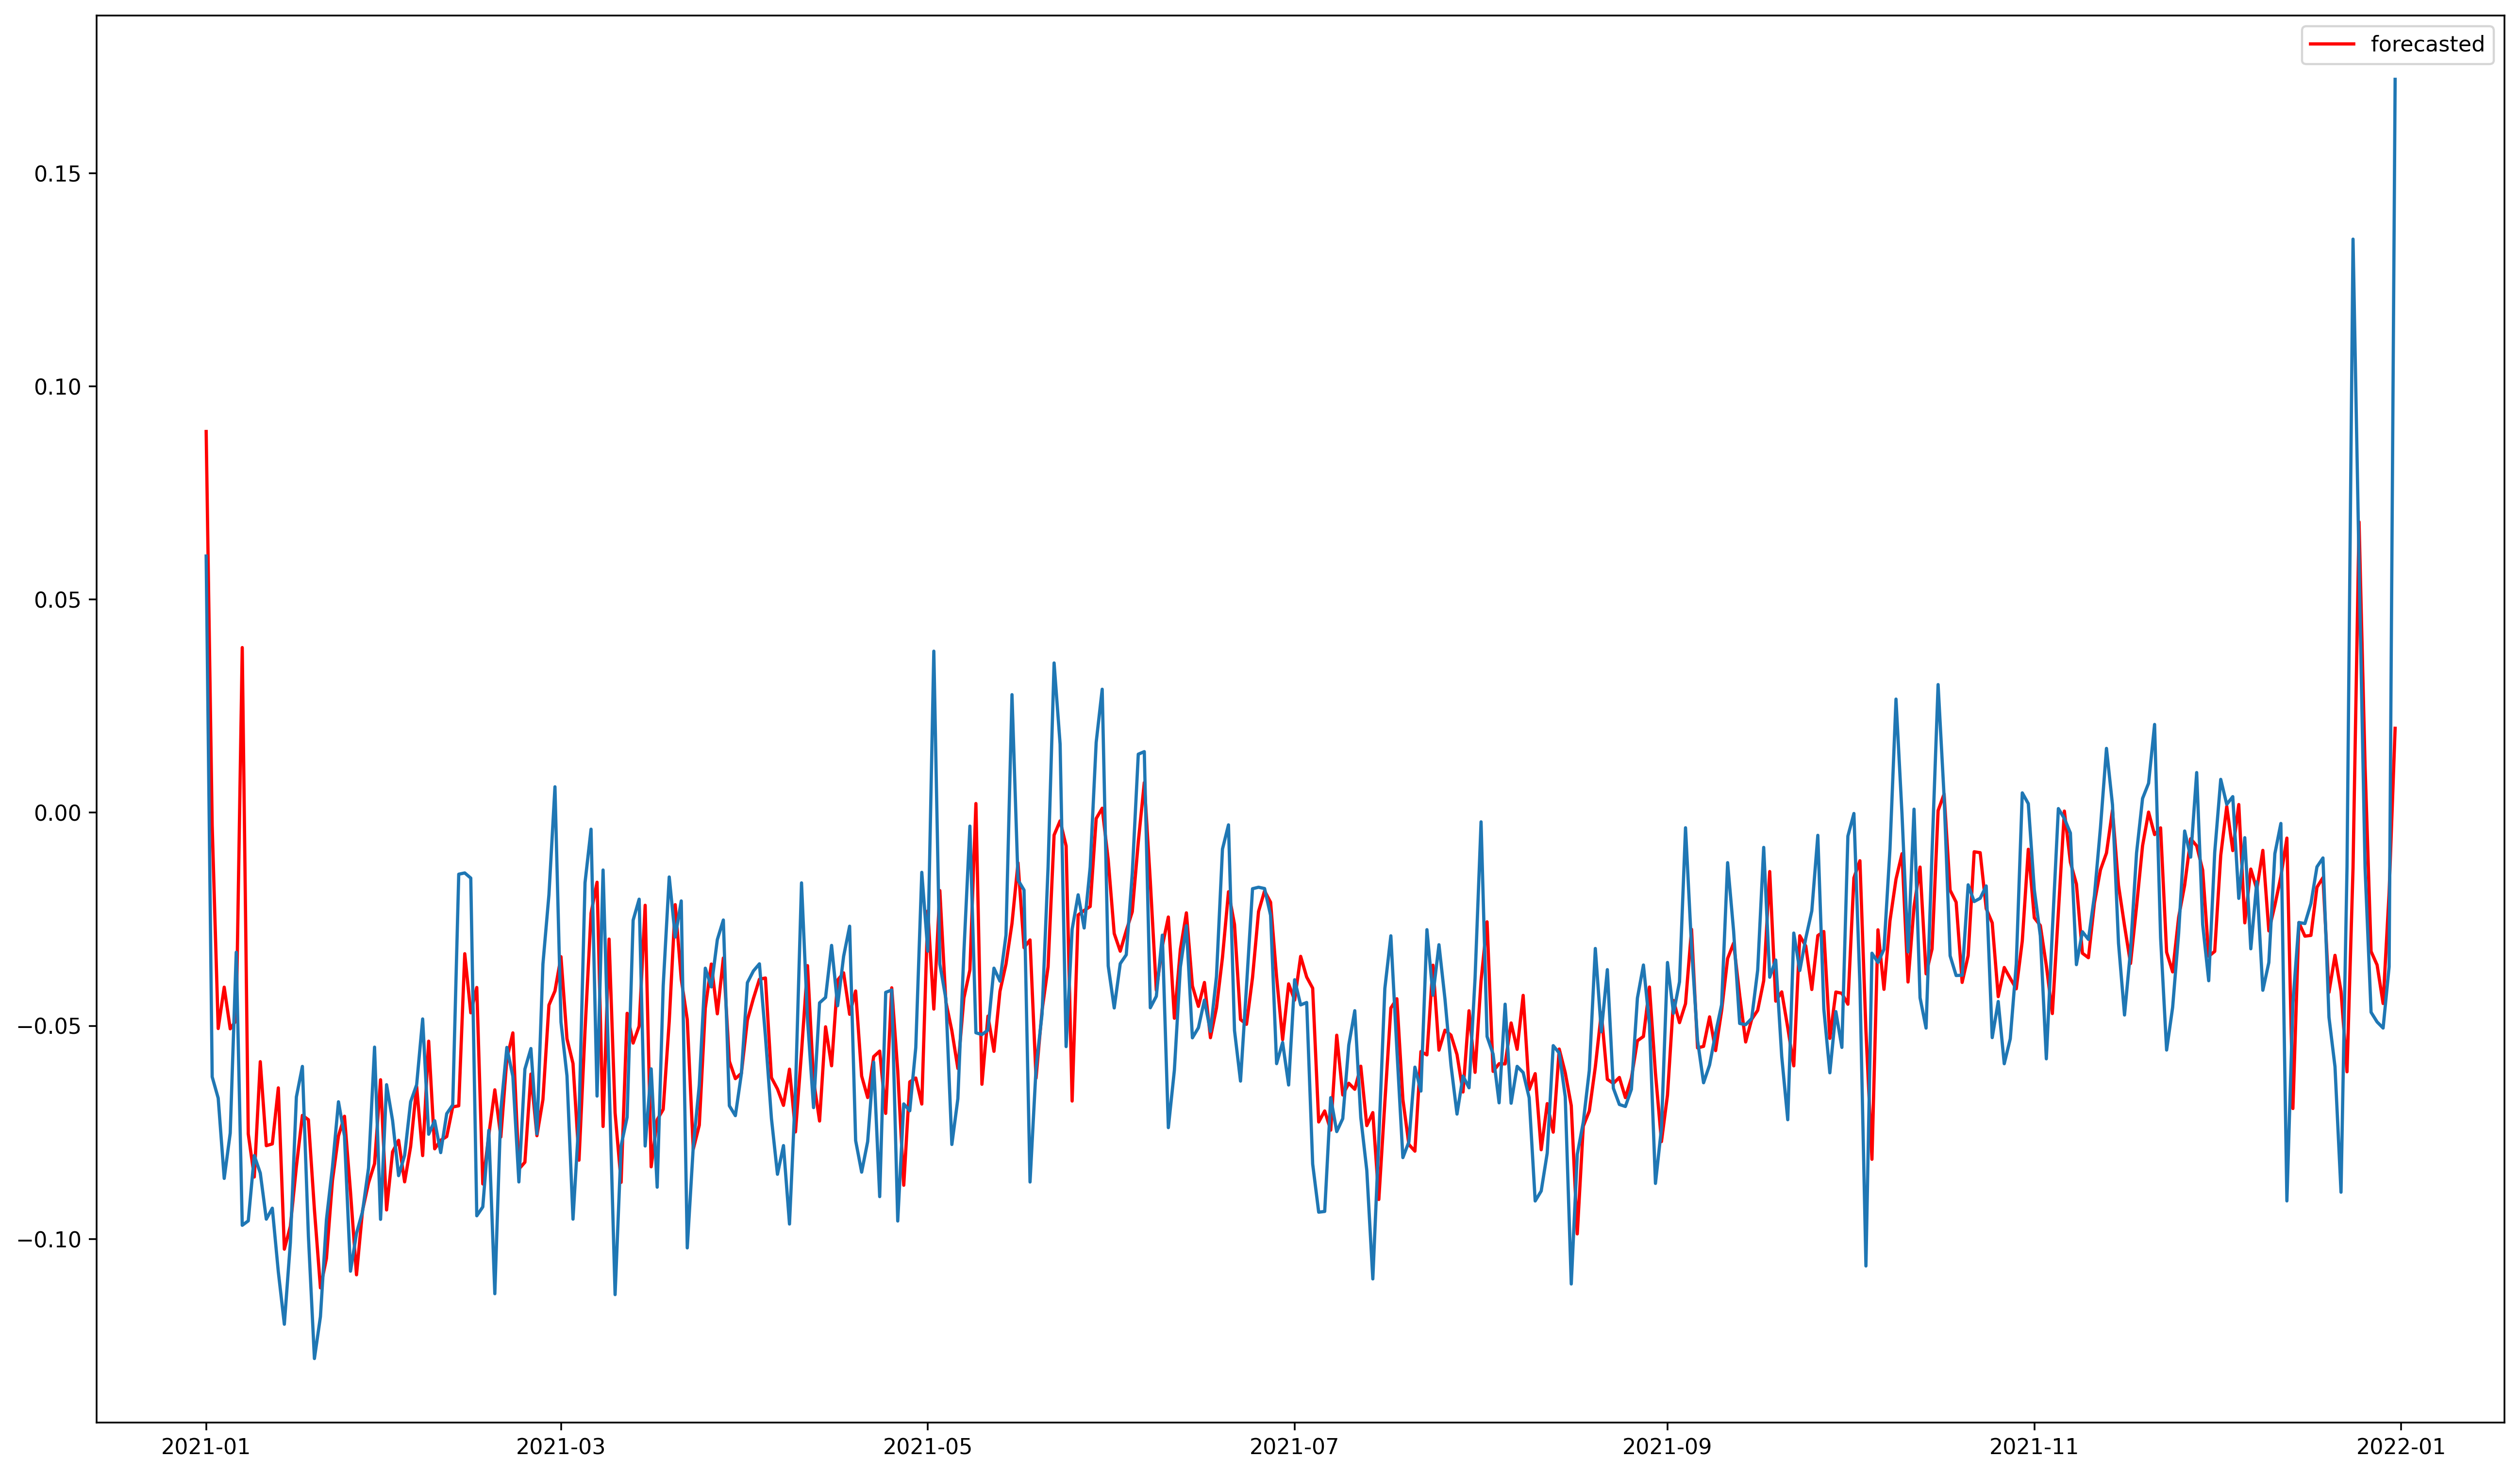

In [17]:
figure(figsize=(20,12), dpi=320)
plt.plot(arima_mean.index, arima_mean, label='forecasted',color='red')
plt.plot(arima_mean.index,df['score'][-365:])
#plt.plot(arima_mean.index, arima_mean)
plt.legend()

In [65]:
starts = [0,91,182,273]
rmse = []

0.021162374810665296

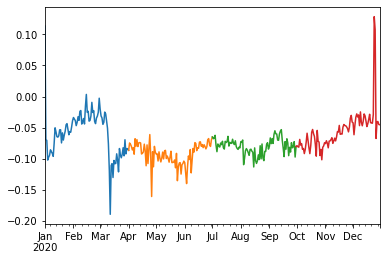

In [66]:
for s in starts:
    pred = results.get_prediction(start=s,end=s+91,dynamic=False)
    pred_mean = pred.predicted_mean
    true_values = df['0'].iloc[s:s+92]
    pred_mean.plot()
    rmse.append(np.sqrt(mean_squared_error(true_values, pred_mean)))

np.mean(rmse)

In [379]:
predictions = pd.DataFrame()
predictions = arima_mean
predictions.index = df.index

In [368]:
np.mean(rmse)

0.021364363909104227

In [ ]:
pred = results.get_prediction(start=df['0'][0], dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
mse = ((y_forecasted - y_to_test) ** 2).mean()

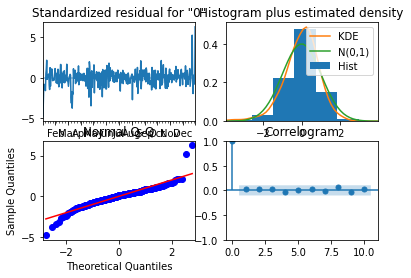

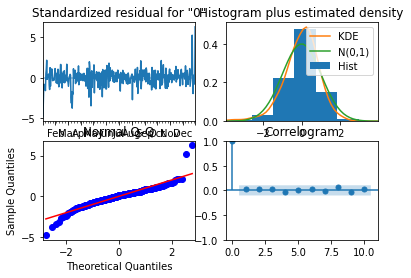

In [304]:
results.plot_diagnostics()

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(predictions, color='blue')
plt.plot(df, color = 'red')

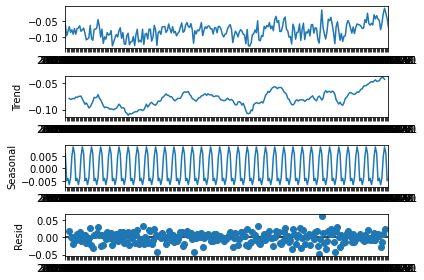

In [149]:
decomp = seasonal_decompose(train, 
                            period=7)
decomp.plot()
plt.show()

In [ ]:
pred = results.get_forecast(150)

pred_mean = pred.predicted_mean
pred_mean

In [125]:
model1 = pm.auto_arima(df['0'], #time series
                      seasonal=True, # is the time series seasonal
                 	  max_p=6, # max value of p to test 
                      max_q=6, # max value of p to test
                      max_P=6, # max value of P to test 
                      max_Q=6, # max value of Q to test,
                      m=7,
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-1608.342, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-1533.154, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-1561.035, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-1572.485, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-1534.932, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=-1571.955, Time=0.89 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=-1610.688, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=-1578.458, Time=0.74 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=-1603.953, Time=1.82 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=-1585.702, Time=2.03 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=-1617.446, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=-1595.609, Time=0.47 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=-1615.393, Time=1.26 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=-1614.389, Time=0.91 sec
 ARIMA(1,1,2)(0,0,1

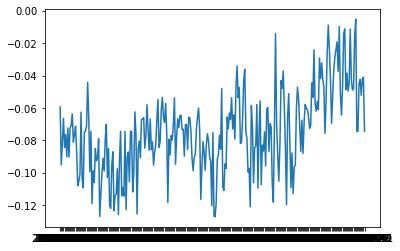

In [64]:
plt.plot(df['0'])
